In [2]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [81]:
german_credit= pd.read_csv("german_credit.csv")
german_credit.shape


(1000, 21)

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

(1000, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [11]:
X=german_credit.drop(labels="default", axis=1)
y=german_credit['default']

In [12]:
# Lets build a Ensemble model but need to modify the dataset fir
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=42)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [48]:
# Print Shape of model data
df_encoded = pd.get_dummies(german_credit, columns=['account_check_status','credit_history', 'purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'], drop_first=True)

### Check for highly correlated variables but don't required any treatment for this use case

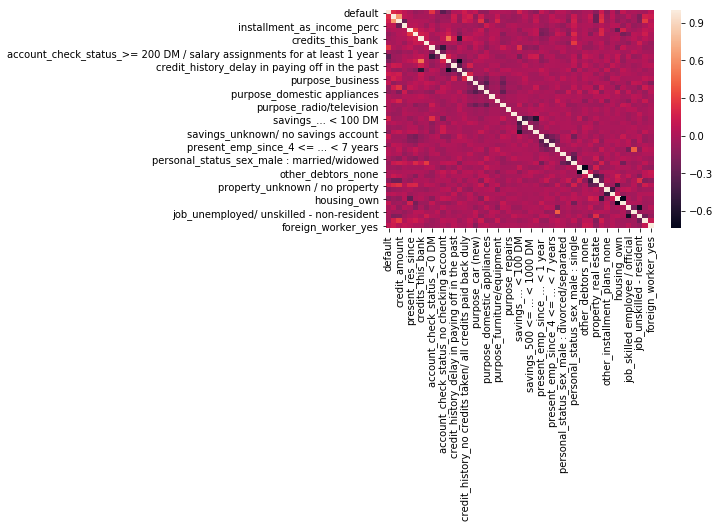

In [49]:
import seaborn as sns
%matplotlib inline

corr = df_encoded.corr()
sns.heatmap(corr)

### Drop the original variables which are converted to dummy

In [50]:
df_encoded.columns
#already droped
col = ['account_check_status','credit_history', 'purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker']
df_encoded.drop(col, inplace=True, axis=1)

KeyError: "['account_check_status' 'credit_history' 'purpose' 'savings'\n 'present_emp_since' 'personal_status_sex' 'other_debtors' 'property'\n 'other_installment_plans' 'housing' 'job' 'telephone' 'foreign_worker'] not found in axis"

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [59]:
from sklearn.preprocessing import StandardScaler
X=df_encoded.drop(labels="default", axis=1)
y=df_encoded['default']
X_std = StandardScaler().fit_transform(X)
# Lets build a Ensemble model but need to modify the dataset fir
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [60]:
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier(n_jobs=2, n_estimators=500,criterion='entropy',random_state=9999)
Rf_model.fit(X_train,y_train)
y_predict_Rf=Rf_model.predict(X_test)
y_predict_Rf_train=Rf_model.predict(X_train)


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [61]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import roc_curve, auc
pd.DataFrame(data=[accuracy_score(y_test, y_predict_Rf), 
                   accuracy_score(y_train, y_predict_Rf_train)], 
             index=["accuracy_test", "accuracy_train"])

,0
accuracy_test,0.753333
accuracy_train,1.000000


In [62]:
#CONFUSION MATRIX
cm=metrics.confusion_matrix(y_test,y_predict_Rf)
print(cm)

[[195  14]
 [ 60  31]]


### Q6 Show the list of the features importance( 1 Marks)

In [63]:
print (pd.Series(Rf_model.feature_importances_,index = list(X)).sort_values(ascending=False))

credit_amount                                                                 0.111545
age                                                                           0.092336
duration_in_month                                                             0.084513
account_check_status_no checking account                                      0.052053
installment_as_income_perc                                                    0.041180
present_res_since                                                             0.040654
account_check_status_< 0 DM                                                   0.031850
credit_history_critical account/ other credits existing (not at this bank)    0.028343
credits_this_bank                                                             0.022560
purpose_car (new)                                                             0.021617
other_installment_plans_none                                                  0.021588
telephone_yes, registered under the custome

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [66]:
# Use below values
num_folds = 10
seed = 77

In [71]:
#Validate the Random Forest model build above using k fold
# evaluate each model in turn
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=num_folds,random_state=seed)
cv_results = model_selection.cross_val_score(Rf_model, X_std, y, cv=kfold, scoring=scoring)




In [0]:
#Calculate Mean score

In [72]:
cv_results.mean()

0.761

In [0]:
# Calculate score standard deviation using std()

In [73]:
cv_results.std()

0.05855766388782941

# Q8 Print the confusion matrix( 1 Marks)

In [80]:
cm=metrics.confusion_matrix(y_test,y_predict_Rf)
print(cm)

[[195  14]
 [ 60  31]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [75]:
Rf_cr=metrics.classification_report(y_test , y_predict_Rf)
print(Rf_cr)

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       209
           1       0.69      0.34      0.46        91

   micro avg       0.75      0.75      0.75       300
   macro avg       0.73      0.64      0.65       300
weighted avg       0.74      0.75      0.72       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [76]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve, auc
y_predictProb = Rf_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])


In [77]:
roc_auc = auc(fpr, tpr)
roc_auc

0.797045060202955

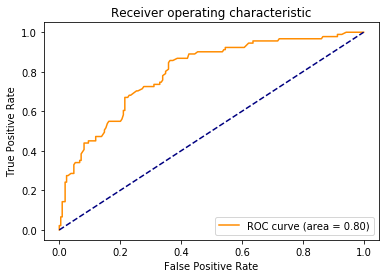

In [78]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
